<h1 style="text-align:center;background-color:#336699;color:white;">TP5
Descente de gradient</h1>
<h3 style="color:#8080C0">A. Descente de gradient</h3>
<h4>1.Calculez l’expression analytique de la fonction E(x) = (x − 1)(x − 2)(x − 3)(x − 5)
et sa dérivée.</h4>
<p style="color:green">E(x) = (x − 1)(x − 2)(x − 3)(x − 5)
    <br/>= (x<sup>2</sup> - 3*x + 2)(x<sup>2</sup> - 8*x + 15)
                       <br/>= x<sup>4</sup> - 8*x<sup>3</sup> + 15*x<sup>2</sup> - 3*x<sup>3</sup> + 24*x<sup>2</sup> - 45*x + 2*x<sup>2</sup> - 16*x + 30
                       <br/>= x<sup>4</sup> - 11*x<sup>3</sup> + 41*x<sup>2</sup> - 61*x + 30
                 <br/> Sa dérivée : E'(x) = 4*x<sup>3</sup> - 33*x<sup>2</sup> + 82*x -61 </p>

<h4>2. Implémentez l’algorithme DG sous Python pour la fonction E(x).</h4>

In [1]:
import numpy as np
from scipy.misc import derivative
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: QIAN Xiaotong
@author: BIAN Yiping
"""

def E(x):
    return (x-1)*(x-2)*(x-3)*(x-5);

def DG(x0,eta,epsilon,nombre_max):
    dic={}
    i = 0
    xi = x0
    xi_1 = xi - eta*derivative(E,xi)
    while((abs(xi_1 - xi) >= epsilon) & (i < nombre_max)):
        xi = xi_1
        xi_1 = xi - eta*derivative(E,xi) 
        i=i+1
    dic['minimum'] = xi_1
    dic['iteration'] = i
    return dic

<h4>3.Pour comprendre ce que fait effectivement la DG, testez l’algorithme implémenté en utilisant des exemples d’exécutions avec des valeurs initiales de x0 et η suivantes :
    <h6>(a) x0 =5 et η=0.001 
    <br/>(b) x0 =5 et η=0.01
    <br/>(c) x0 =5 et η=0.1 
    <br/>(d) x0 =5 et η=0.17
    <br/>(e) x0 =5 et η=1
    <br/>(f) x0 =0 et η=0.001</h6></h4>

In [2]:
DG(5,0.001,0.01,1000)

{'minimum': 4.441918519633145, 'iteration': 30}

In [3]:
DG(5,0.01,0.01,1000)

{'minimum': 4.051313739254914, 'iteration': 13}

In [4]:
DG(5,0.1,0.01,1000)

{'minimum': 1.970713096889272, 'iteration': 6}

In [5]:
DG(5,0.017,0.01,1000)

{'minimum': 4.022931334248596, 'iteration': 9}

In [6]:
DG(5,1,0.01,1000)

{'minimum': 1.0047823756649958e+48, 'iteration': 4}

In [7]:
DG(0,0.001,0.01,1000)

{'minimum': 1.1895558059642402, 'iteration': 45}

<h4>4. Affichez le minimum trouvé,ainsi que E(xmin) et lenombre d’itérations. Que constatez-
vous ?</h4>

In [8]:
E(DG(5,0.001,0.01,1000)['minimum'])

-6.763478042464527

In [9]:
E(DG(5,0.01,0.01,1000)['minimum'])

-6.2427206928860475

In [10]:
E(DG(5,0.1,0.01,1000)['minimum'])

-0.0886423362134923

In [11]:
E(DG(5,0.017,0.01,1000)['minimum'])

-6.11196687251445

In [12]:
E(DG(5,1,0.01,1000)['minimum'])

1.0192671673981714e+192

In [13]:
E(DG(0,0.001,0.01,1000)['minimum'])

-1.0597927750528027

In [14]:
# Selon le resultat obetnu, la valeur de x qui minimise E(x) est donc:
x = DG(5,0.001,0.01,1000)['minimum']
fonc_E = E(x)
iteration = DG(5,0.001,0.01,1000)['iteration']

print('le minimum trouvé est : ',x,' et E(Xmin) = ', fonc_E ,' et le nombre d''itération est : ',iteration)

le minimum trouvé est :  4.441918519633145  et E(Xmin) =  -6.763478042464527  et le nombre ditération est :  30


<h4>
5. Visualisez l’évolution des minimums de la fonction E(x) trouvés au cours des itérations.</h4>

range(0, 30)
[ 0.         -0.76400825 -1.43561257 -2.02780204 -2.5514303  -3.01561824
 -3.42807131 -3.79533145 -4.12297855 -4.41579267 -4.67788541 -4.91280701
 -5.12363415 -5.31304222 -5.48336522 -5.63664556 -5.77467569 -5.89903303
 -6.0111094  -6.11213593 -6.20320419 -6.28528417 -6.35923971 -6.42584171
 -6.48577941 -6.53967028 -6.58806842 -6.63147193 -6.67032933 -6.70504509]


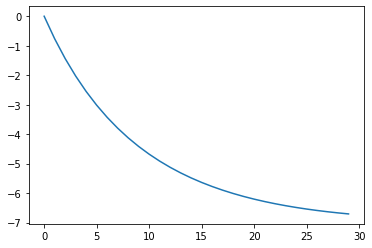

In [15]:
import matplotlib.pyplot as plt

x = np.zeros(iteration)
list_E = np.zeros(iteration)
x[0] = 5
list_E[0] = E(x[0])
for i in range(1,iteration):
    x[i] = x[i-1] - 0.001*derivative(E,x[i-1])
    list_E[i] = E(x[i])
plt.plot(range(iteration),list_E)
print(range(iteration))
print(list_E)


<h4>6. Testez votre algorithme avec d’autres valeurs de ε et nombremax.</h4>

In [16]:
#Essayer avec epsilon = 0.001 et nombre_max = 1000
DG(5,0.001,0.001,1000)

{'minimum': 4.064775690466036, 'iteration': 142}

In [17]:
#Essayer avec epsilon = 0.01 et nombre_max = 10000
DG(5,0.001,0.01,10000)

{'minimum': 4.441918519633145, 'iteration': 30}

In [18]:
#Essayer avec epsilon = 0.0001 et nombre_max = 1000
DG(5,0.001,0.0001,1000)

{'minimum': 4.006949110043423, 'iteration': 296}

In [19]:
#Essayer avec epsilon = 0.001 et nombre_max = 10000
DG(5,0.001,0.001,1000)

{'minimum': 4.064775690466036, 'iteration': 142}

<h3 style="color:#8080C0">B. Descente de gradient pour la régression linéaire</h3>
<h4>1.Calculez les dérivées partielles de la fonction E(a,b) selon a et b.</h4>
<p style="color:green">∂E(a,b)/∂a = &sum; (2a*x<sub>i</sub><sup>2</sup> + 2*b*x<sub>i</sub> - 2*x<sub>i</sub>*y<sub>i</sub>) <br/>∂E(a,b)/∂b = &sum; (2b - 2*y<sub>i</sub> + 2*a*x<sub>i</sub>)</p>

<h4>2. Implémentez l’algorithme DG sous Python pour la fonction E(a,b). </h4>

In [48]:
def DG(eta,nombre_max):
    dic={}
    a, b = symbols('a b', real=True)
    i = 0
    ai = 0
    bi = 0
    forme = E(a,b)
    a_ = diff(forme,a) #derive partielle de a
    b_ = diff(forme,b) #derive partielle de b
    ai_1 = ai - eta*(a_.subs({a:ai, b:bi}))
    bi_1 = bi - eta*(b_.subs({a:ai, b:bi}))

    while(((abs(ai_1 - ai) >= 0.01) | (abs(bi_1 - bi) >= 0.01)) & (i < nombre_max)):
        ai = ai_1
        bi = bi_1
        ai_1 = ai - eta*(a_.subs({a:ai, b:bi}))
        bi_1 = bi - eta*(b_.subs({a:ai, b:bi}))
        i=i+1
    
    dic['minimum_a'] = ai_1
    dic['minimum_b'] = bi_1
    dic['iteration'] = i
    dic['valeur_E'] = E(ai_1,bi_1)
    return dic

<h4>3.Importez la fonction datasets.make_regression et utilisez la pour générez un pro- blème de régression aléatoire de 100 example avec une seule variable. Appliquez l’algorithme implémenté au jeu de données généré avec les paramètres suivants :</h4>

In [49]:
from sympy import symbols, diff
from sklearn.datasets import make_regression

X,Y = make_regression(n_samples=100, n_features=1)
X = X.reshape(100,)
def E(a, b):
    sum = 0
    for i in range(len(X)):
        sum = sum + (a*X[i] + b - Y[i])**2
    return sum

In [50]:
DG(0.001,100)

{'minimum_a': 61.3529756346120,
 'minimum_b': -0.00648240031276149,
 'iteration': 31,
 'valeur_E': 0.118593300533658}

In [51]:
DG(0.001,500)

{'minimum_a': 61.3529756346120,
 'minimum_b': -0.00648240031276149,
 'iteration': 31,
 'valeur_E': 0.118593300533658}

In [52]:
DG(0.001,1000)

{'minimum_a': 61.3529756346120,
 'minimum_b': -0.00648240031276149,
 'iteration': 31,
 'valeur_E': 0.118593300533658}

In [53]:
DG(0.01,1000)

{'minimum_a': 1.94879082897329e+48,
 'minimum_b': -6.89398294660114e+47,
 'iteration': 1000,
 'valeur_E': 4.51454485448178e+98}

In [54]:
DG(1,1000)

{'minimum_a': 8.03386801059795e+2326,
 'minimum_b': -2.84203662275475e+2326,
 'iteration': 1000,
 'valeur_E': 7.67242943392890e+4655}

<h4>4. Affichez les coefficients trouvés, ainsi que la valeur de E(amin,bmin) et le nombre
d’itérations. Que constatez-vous ?</h4>
<p style="color:green">Selon le résultat obtenu par rapport à DG(0.001,100), DG(0.001,500), DG(0.001,1000), le coefficient trouve est a = 61.3529756346120, b = -0.00648240031276149 et nombre d'itération : 31 et E(a<sub>min</sub>,b<sub>min</sub>) = 0.118593300533658. Remaraque: Si η est trop grand, les valeurs de a et b ont fluctué de haut en bas par rapport à la valeur idéale et ne peuvent pas s'approcher de la valeur idéale.</p>
<h4>5. Importez la fonction stats.linregress de scipy. Utilisez cette fonction pour résoudre le même problème. Comparez les résultats obtenus. Que constatez-vous ?</h4>

In [57]:
from scipy import stats
a,b, r_value, p_value, std_err= stats.linregress(X, Y)

In [58]:
a # valeur de a

61.386114791489824

In [59]:
b # valeur de b

6.661338147750939e-16

In [60]:
r_value # coefficient de la correlation

1.0

<p style="color:green"> Comparer avec le DG qu'on a fait, on obtient presque la même valeur de a et b.</p>
<h4>6. Visualisez le jeu de données généré avec les fonctions approximatives obtenues en utilisant les deux méthodes.</h4>

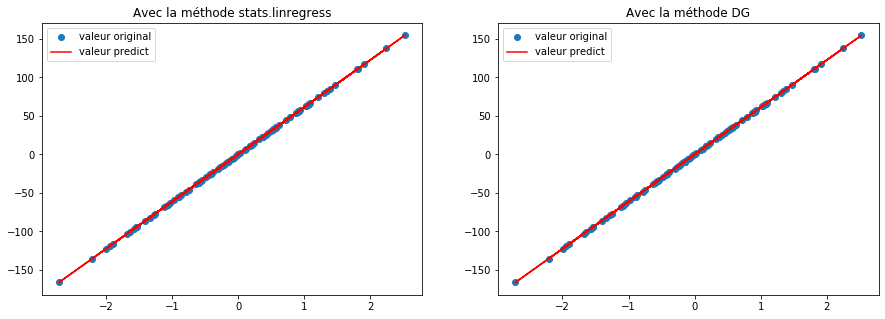

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Avec la méthode stats.linregress')
plt.plot(X, Y, 'o', label='valeur original')
plt.plot(X, a*X+b, 'r', label='valeur predict')
plt.legend()

plt.subplot(122)
plt.title('Avec la méthode DG')
plt.plot(X, Y, 'o', label='valeur original')
plt.plot(X, DG(0.001,100)['minimum_a']*X+DG(0.001,100)['minimum_b'], 'r', label='valeur predict')
plt.legend()

plt.show()

<p style="color:green">cela montre encore une fois on obtient la même chose par rapport à ces deux méthodes</p>